In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm, skew, probplot
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

NAmes      326
CollgCr    188
OldTown    166
Sawyer     115
Gilbert    112
Edwards    112
Somerst    111
NWAmes      99
NridgHt     95
BrkSide     85
SawyerW     85
Mitchel     84
Crawfor     69
NoRidge     46
IDOTRR      43
Timber      42
StoneBr     38
SWISU       32
MeadowV     30
ClearCr     27
BrDale      21
NPkVill     18
Blmngtn     18
Veenker     15
Greens       7
Name: Neighborhood, dtype: int64
Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal', 'MoSold',
       'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr', 'gcode',
       'lat', 'long', 'dist', 'zip', 'tract', 'income', 'hood_Blmngtn',


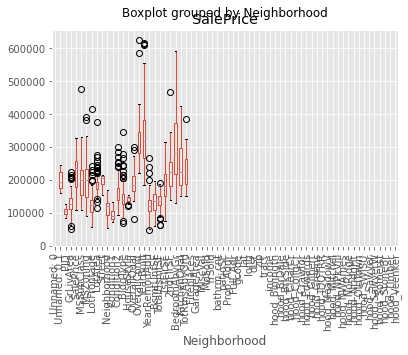

In [2]:
from clean_data import * 

In [3]:
pmin = min(Y)
print(pmin)

pmax = max(Y)
print(pmax)

print(train.shape)
print(Y.shape)

train.columns


24.56597222222222
138.12544045102186
(1978, 82)
(1978,)


Index(['PID', 'GrLivArea', 'SalePrice', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal',
       'MoSold', 'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr',
       'gcode', 'lat', 'long', 'dist', 'zip', 'tract', 'income',
       'hood_Blmngtn', 'hood_BrDale', 'hood_BrkSide', 'hood_ClearCr',
       'hood_CollgCr', 'hood_Crawfor', 'hood_Edwards', 'hood_Gilbert',
       'hood_Greens', 'hood_IDOTRR', 'hood_MeadowV', 'hood_Mitchel',
       'hood_NPkVill', 'hood_NWAmes', 'hood_NoRidge', 'hood_NridgHt',
       'hood_OldTown', 'hood_SWISU', 'hood_Sawyer', 'hood_SawyerW',
       'hood_Somerst', 'hood_StoneBr', 'hood_Timber', 'hood_Veenker',
       'FinBsmtSF', 'TotalSF', 'bsmt_above_ratio', 'MSZon

In [4]:
train['target'] = train['SalePrice']/train['TotalSF']
import folium
import branca.colormap as cm

#colormap = cm.LinearColormap(colors=['blue','red'], index=[40000,500000],vmin=40000,vmax=625000)

colormap = cm.StepColormap(
    colors=['#00ae53', '#86dc76', '#daf8aa',
            '#ffe6a4', '#ff9a61', '#ee0028'],
    vmin=min(Y),
    vmax=max(Y),
    index=[20, 40, 60, 80, 100, 120, 140])



map1 = folium.Map(
    location=[42.0267,-93.6465],
    tiles='cartodbpositron',
    zoom_start=12,
)
train.apply(lambda row:folium.Circle(location=[row["lat"], row["long"]], radius=((row['income'])**2/1e8), fill=True, color=colormap(row['target'])).add_to(map1), axis=1)


map1.save('map.html')
map1


# map for houses, radius = income and color = price/SF

Since houses are priced by their size, it makes sense that the SALE PRICE and the total SF are strongly correlated. 

Coefficient of determination: 0.69


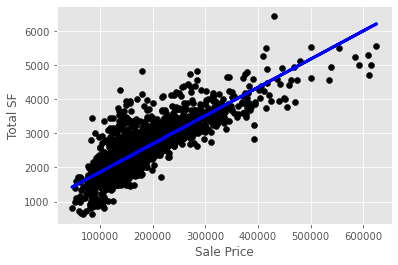

In [5]:
# Ground Living Area and Total Sf.
# plt.scatter(train['SalePrice'],train['TotalSF'])
# plt.ylabel('Total size [sf]')
# plt.xlabel('Sales Price')


# # creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
lm.fit(train[['SalePrice']],train['TotalSF'])
Y_P =  lm.predict(train[['SalePrice']])

## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(train['TotalSF'], Y_P))

# ## Plot outputs
plt.scatter(train[['SalePrice']], train['TotalSF'],  color='black')
plt.plot(train[['SalePrice']], Y_P, color='blue', linewidth=3)

plt.xlabel('Sale Price')
plt.ylabel('Total SF')


plt.savefig('./Figures/price_size_scatter.png', bbox_inches = 'tight', dpi=350)

/Users/Lena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


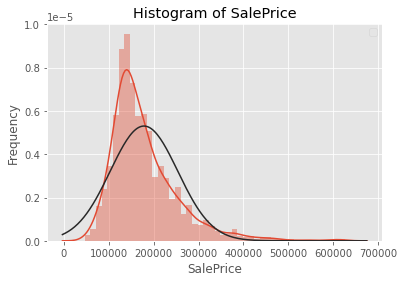

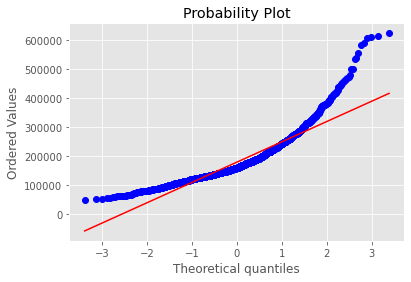

In [6]:
mu, sigma = norm.fit(train['SalePrice'])
plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')

sns.distplot(train['SalePrice'], fit=norm)
#plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice');
plt.savefig('./Figures/SalePrice_distrib.png', bbox_inches = 'tight', dpi=350)


fig = plt.figure()
res = probplot(train['SalePrice'], plot=plt);
plt.savefig('./Figures/SalePrice_prod.png', bbox_inches = 'tight', dpi=350)

/Users/Lena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


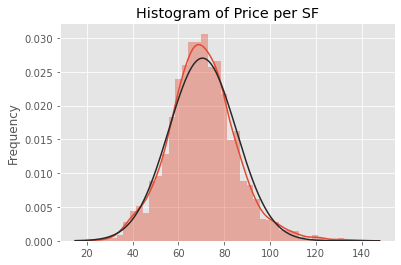

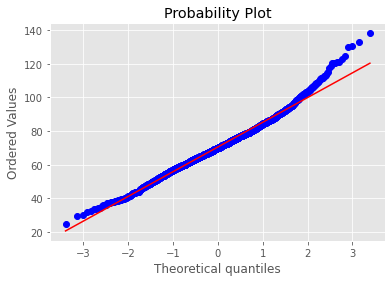

In [7]:
mu, sigma = norm.fit(Y)
sns.distplot(Y, fit=norm)
#plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of Price per SF');
plt.savefig('./Figures/price_SF_distrib.png', bbox_inches = 'tight', dpi=350)


fig = plt.figure()
res = probplot(Y, plot=plt);
plt.savefig('./Figures/price_SF_prod.png', bbox_inches = 'tight', dpi=350)

Explore some relationships

In [8]:
train['PricePerSF'] = train['SalePrice']/train['TotalSF']

In [20]:
X1.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'KitchenQual', 'Fireplaces', 'GarageArea', 'MiscVal', 'bathrm_cnt',
       'patioSF', 'dist', 'income', 'hood_Blmngtn', 'hood_BrDale',
       'hood_BrkSide', 'hood_ClearCr', 'hood_CollgCr', 'hood_Crawfor',
       'hood_Edwards', 'hood_Gilbert', 'hood_Greens', 'hood_IDOTRR',
       'hood_MeadowV', 'hood_Mitchel', 'hood_NPkVill', 'hood_NWAmes',
       'hood_NoRidge', 'hood_NridgHt', 'hood_OldTown', 'hood_SWISU',
       'hood_Sawyer', 'hood_SawyerW', 'hood_Somerst', 'hood_StoneBr',
       'hood_Timber', 'hood_Veenker', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'NearRR', 'NearPos', 'Artery', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Bsmt_ratio', 'Bedr_ratio', 'TotalBsmtSF',
       'bsmt_above_ratio'],
      dtype='object')

### Features that were created for analysis
- distance to university was found with geopy
- income per census tract was added (does not necessary line up with the neighborhood.)
- NA in LotFrontage were filled with median 
- NA in income were filled with median
- Finished Basement area was calculated using Total Bsmt SF - Basement unfinished SF
- Total SF (part of target) was calculated using Total BsmtSF + first FL SF + second FL SF
- bsmt above ground ration is calculated by dividing the total Bsmt SF by the first + second flr SF
- Basement ration is calculated by finished/totalBsmt SF
- Bedr ratio is calculated by Bedroom above Grd/ total rms (--> larger number means more bdr than other rms)
- 

Coefficient of determination: 0.04


Text(0, 0.5, 'dist')

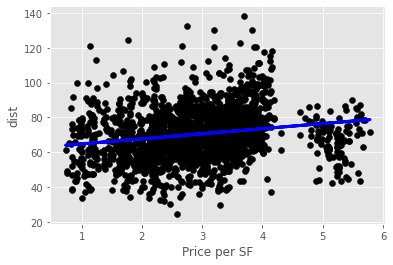

In [10]:
# Income
lm = LinearRegression()
# fitting the training data
lm.fit(train[['dist']],train['PricePerSF'])
Y_P =  lm.predict(train[['dist']])

## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(train['PricePerSF'], Y_P))

# ## Plot outputs
plt.scatter(train[['dist']], train['PricePerSF'],  color='black')
plt.plot(train[['dist']], Y_P, color='blue', linewidth=3)

plt.xlabel('Price per SF')
plt.ylabel('dist')


In [11]:
train['bsmt_above_ratio'] = X1['bsmt_above_ratio']
train['Bedr_ratio'] = X1['Bedr_ratio']

In [12]:
train['bedr_ratio_bins'] = pd.cut(train['Bedr_ratio'],bins = np.arange(0,1.1, 0.1))

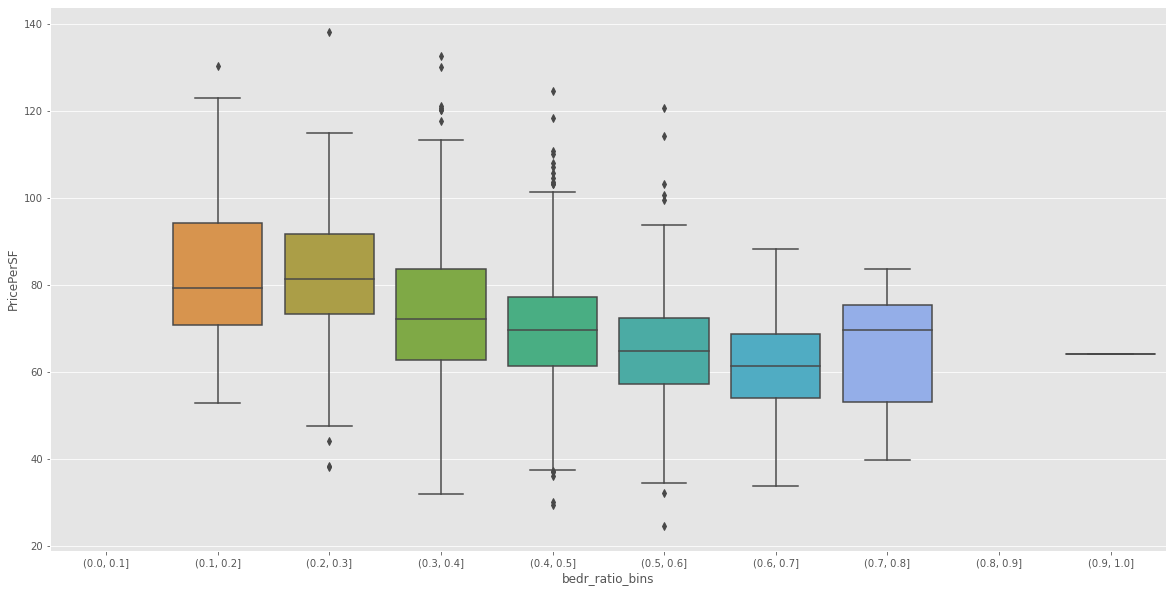

In [13]:
grouped = train[['PricePerSF', 'bedr_ratio_bins']].groupby(['bedr_ratio_bins']).median().sort_values(by='bedr_ratio_bins')

plt.figure(figsize=(20,10))
sns.boxplot(x=train.bedr_ratio_bins, y=train.PricePerSF, order=grouped.index)

plt.savefig('./Figures/bedr_ratio.png', bbox_inches = 'tight', dpi=350)

In [17]:
train['Bsmt_ratio_bins'] = pd.cut(train['Bsmt_ratio'],bins = np.arange(0,1.1, 0.1))


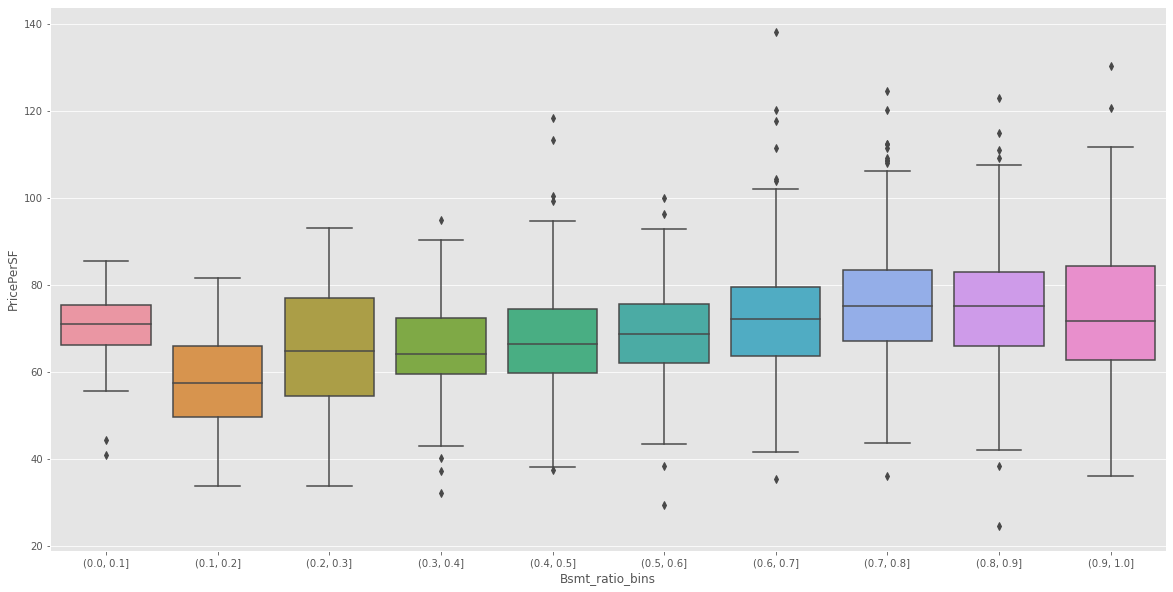

In [19]:
grouped = train[['PricePerSF', 'Bsmt_ratio_bins']].groupby(['Bsmt_ratio_bins']).median().sort_values(by='Bsmt_ratio_bins')

plt.figure(figsize=(20,10))
sns.boxplot(x=train.Bsmt_ratio_bins, y=train.PricePerSF, order=grouped.index)

plt.savefig('./Figures/Bsmt_ratio_bins.png', bbox_inches = 'tight', dpi=350)

In [21]:
train['bsmt_above_ratio_bins'] = pd.cut(X1['bsmt_above_ratio'],bins = np.arange(0,1.1, 0.1))


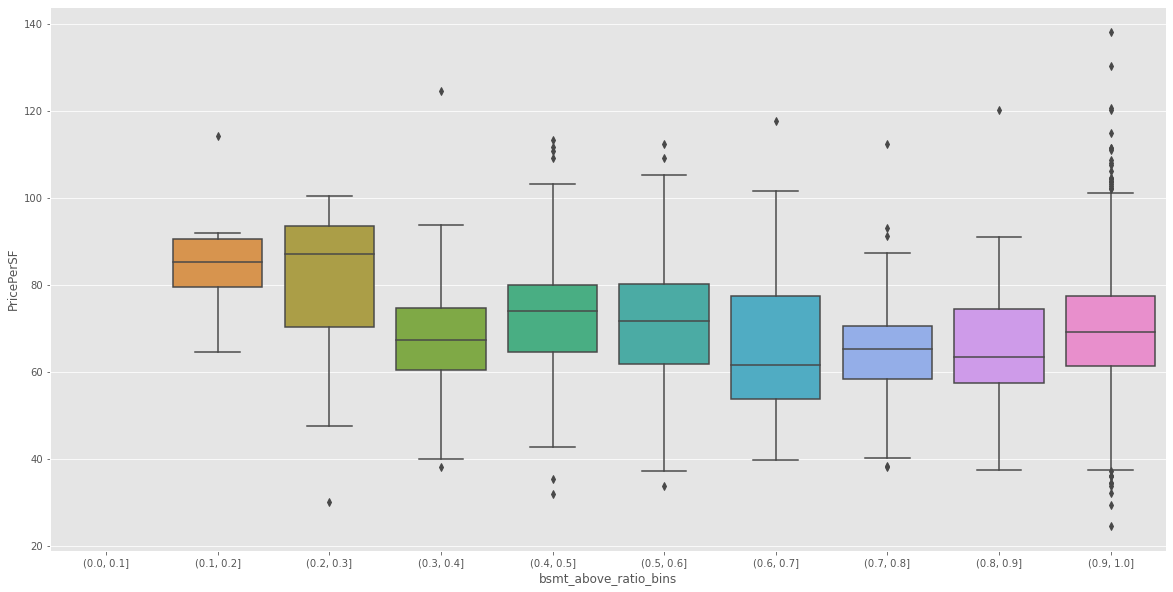

In [23]:
grouped = train[['PricePerSF', 'bsmt_above_ratio_bins']].groupby(['bsmt_above_ratio_bins']).median().sort_values(by='bsmt_above_ratio_bins')

plt.figure(figsize=(20,10))
sns.boxplot(x=train.bsmt_above_ratio_bins, y=train.PricePerSF, order=grouped.index)

plt.savefig('./Figures/bsmt_above_ratio.png', bbox_inches = 'tight', dpi=350)

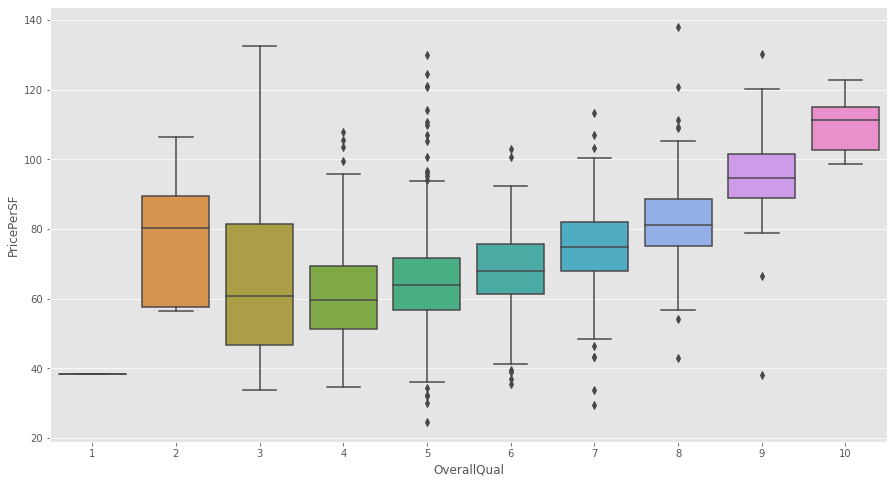

In [26]:
grouped = train[['PricePerSF', 'OverallQual']].groupby(['OverallQual']).median().sort_values(by='OverallQual')

plt.figure(figsize=(15,8))
sns.boxplot(x=train.OverallQual, y=train.PricePerSF, order=grouped.index)

plt.savefig('./Figures/Overall_Qual', bbox_inches = 'tight', dpi=350)

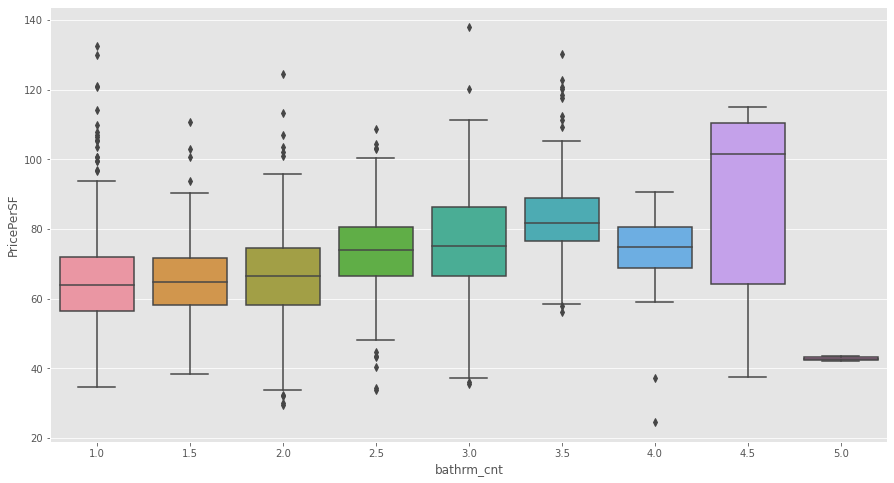

In [28]:
grouped = train[['PricePerSF', 'bathrm_cnt']].groupby(['bathrm_cnt']).median().sort_values(by='bathrm_cnt')

plt.figure(figsize=(15,8))
sns.boxplot(x=train.bathrm_cnt, y=train.PricePerSF, order=grouped.index)
plt.savefig('./Figures/bathrm_cnt', bbox_inches = 'tight', dpi=350)

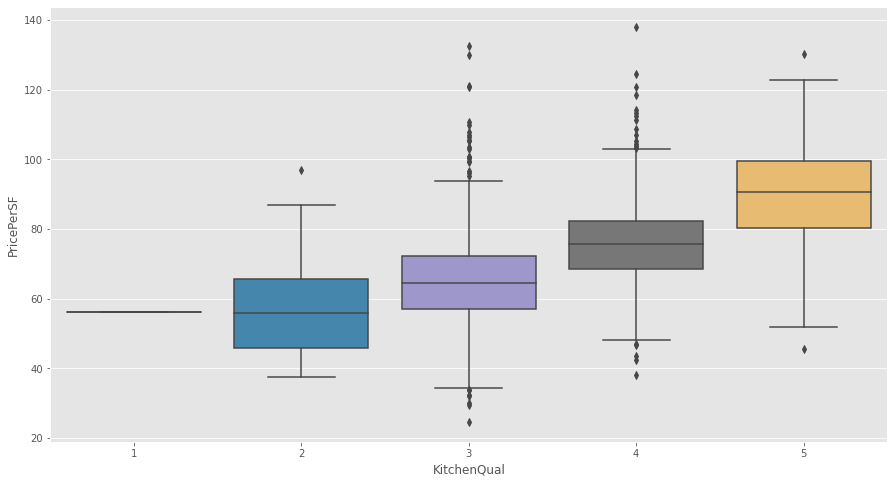

In [30]:
grouped = train[['PricePerSF', 'KitchenQual']].groupby(['KitchenQual']).median().sort_values(by='KitchenQual')

plt.figure(figsize=(15,8))
sns.boxplot(x=train.KitchenQual, y=train.PricePerSF, order=grouped.index)
plt.savefig('./Figures/Kitchen_Qual', bbox_inches = 'tight', dpi=350)

<Figure size 1440x720 with 0 Axes>

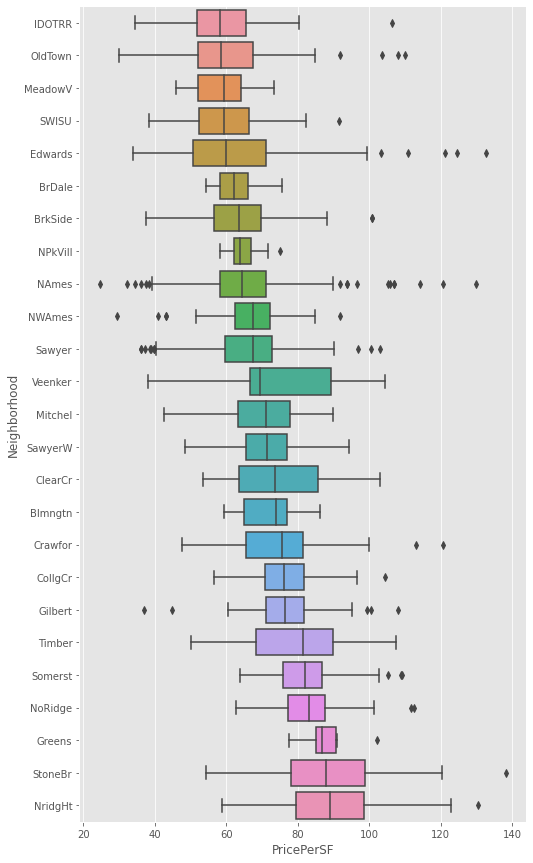

In [33]:
plt.figure(figsize=(20,10))

grouped = train[['PricePerSF', 'Neighborhood']].groupby(['Neighborhood']).median().sort_values(by='PricePerSF')

plt.figure(figsize=(8,15))
sns.boxplot(y = train.Neighborhood, x = train.PricePerSF, order=grouped.index)
plt.savefig('./Figures/Hoods', bbox_inches = 'tight', dpi=350)

In [36]:
# grouped = train[['PricePerSF', 'BedroomAbvGr']].groupby(['BedroomAbvGr']).median().sort_values(by='BedroomAbvGr')

# sns.boxplot(x=train.BedroomAbvGr, y=train.PricePerSF, order=grouped.index)

In [35]:
X1.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'KitchenQual', 'Fireplaces', 'GarageArea', 'MiscVal', 'bathrm_cnt',
       'patioSF', 'dist', 'income', 'hood_Blmngtn', 'hood_BrDale',
       'hood_BrkSide', 'hood_ClearCr', 'hood_CollgCr', 'hood_Crawfor',
       'hood_Edwards', 'hood_Gilbert', 'hood_Greens', 'hood_IDOTRR',
       'hood_MeadowV', 'hood_Mitchel', 'hood_NPkVill', 'hood_NWAmes',
       'hood_NoRidge', 'hood_NridgHt', 'hood_OldTown', 'hood_SWISU',
       'hood_Sawyer', 'hood_SawyerW', 'hood_Somerst', 'hood_StoneBr',
       'hood_Timber', 'hood_Veenker', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'NearRR', 'NearPos', 'Artery', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Bsmt_ratio', 'Bedr_ratio', 'TotalBsmtSF',
       'bsmt_above_ratio'],
      dtype='object')

In [38]:
# grouped = train[['PricePerSF', 'TotRmsAbvGrd']].groupby(['TotRmsAbvGrd']).median().sort_values(by='TotRmsAbvGrd')

# sns.boxplot(x=train.TotRmsAbvGrd, y=train.PricePerSF, order=grouped.index)

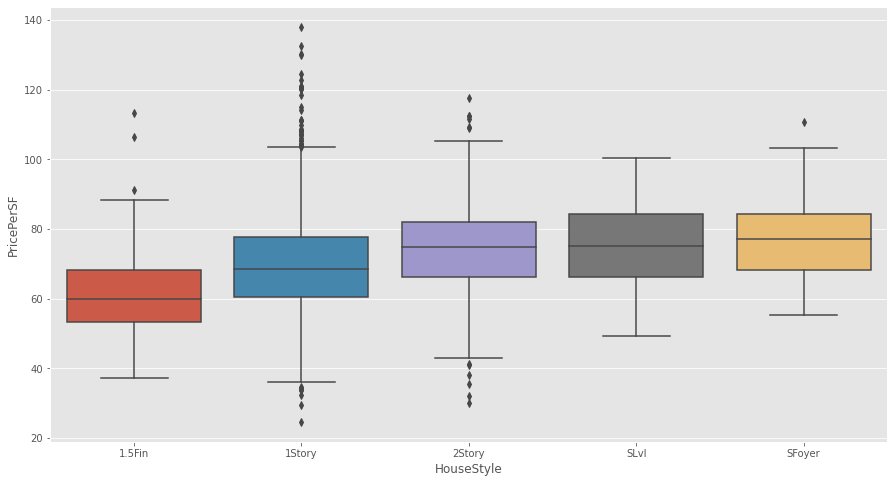

In [40]:
grouped = train[['PricePerSF', 'HouseStyle']]\
.groupby(['HouseStyle']).median().sort_values(by='PricePerSF')

plt.figure(figsize=(15,8))
sns.boxplot(x=train.HouseStyle, y=train.PricePerSF, order=grouped.index)
plt.savefig('./Figures/House_style', bbox_inches = 'tight', dpi=350)

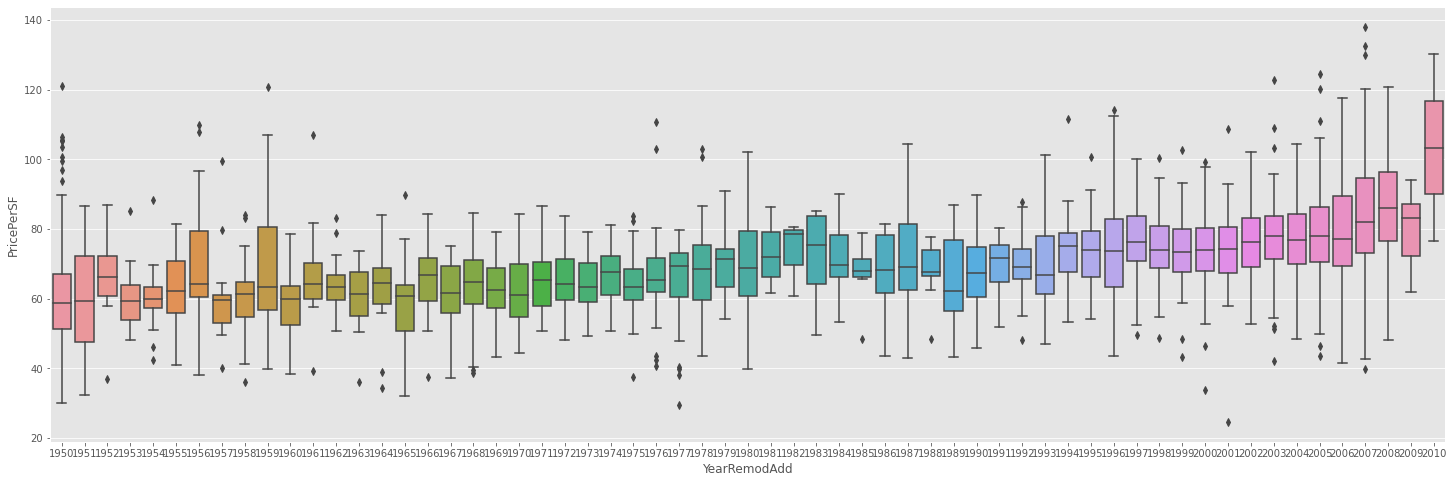

In [44]:
plt.figure(figsize=(25,8))

grouped = train[['PricePerSF', 'YearRemodAdd']].groupby(['YearRemodAdd']).median().sort_values(by='YearRemodAdd')
grouped
sns.boxplot(x = train.YearRemodAdd, y  = train.PricePerSF, order=grouped.index)
plt.savefig('./Figures/Yr_remodel', bbox_inches = 'tight', dpi=350)

In [ ]:
train.columns

Coefficient of determination: 0.16


Text(0, 0.5, 'GarageArea')

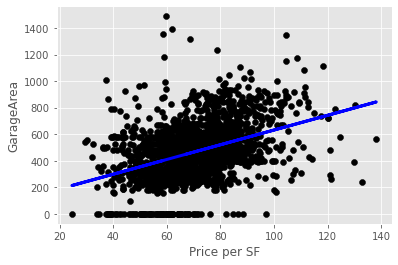

In [45]:
# # creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
lm.fit(train[['PricePerSF']],train['GarageArea'])
Y_P =  lm.predict(train[['PricePerSF']])

## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(train['GarageArea'], Y_P))

# ## Plot outputs
plt.scatter(train[['PricePerSF']], train['GarageArea'],  color='black')
plt.plot(train[['PricePerSF']], Y_P, color='blue', linewidth=3)

plt.xlabel('Price per SF')
plt.ylabel('GarageArea')


#plt.savefig('./Figures/price_size_scatter.png', bbox_inches = 'tight', dpi=350)

Coefficient of determination: 0.01


Text(0, 0.5, 'LotArea')

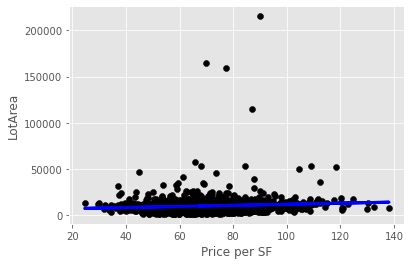

In [46]:
# # creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
lm.fit(train[['PricePerSF']],train['LotArea'])
Y_P =  lm.predict(train[['PricePerSF']])

## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(train['LotArea'], Y_P))

# ## Plot outputs
plt.scatter(train[['PricePerSF']], train['LotArea'],  color='black')
plt.plot(train[['PricePerSF']], Y_P, color='blue', linewidth=3)

plt.xlabel('Price per SF')
plt.ylabel('LotArea')


#plt.savefig('./Figures/price_size_scatter.png', bbox_inches = 'tight', dpi=350)

In [47]:
## Load models
import pickle

with open("Pickle_xgbooster.pkl" , 'rb') as file:  
     XGBoost = pickle.load(file)

NAmes      74
CollgCr    48
Edwards    42
OldTown    37
Gilbert    31
Somerst    28
SawyerW    27
NWAmes     24
Sawyer     23
NoRidge    19
Mitchel    19
Crawfor    19
BrkSide    18
NridgHt    15
IDOTRR     12
Timber     10
SWISU       9
BrDale      8
Veenker     8
ClearCr     6
Blmngtn     5
StoneBr     5
NPkVill     4
MeadowV     4
Greens      1
Name: Neighborhood, dtype: int64
Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal', 'MoSold',
       'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr', 'gcode',
       'lat', 'long', 'dist', 'zip', 'tract', 'income', 'hood_Blmngtn',
       'hood_BrDale', 'ho

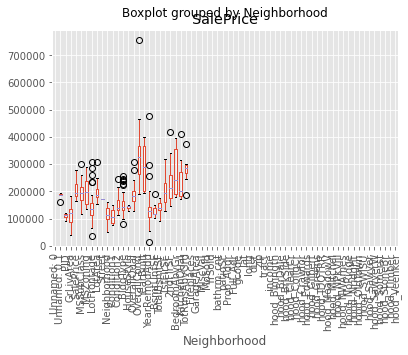

In [48]:
from clean_data_test import X1_test, Y_test

In [49]:
print(XGBoost.score(X1_test, Y_test))
predictions_test = XGBoost.predict(X1_test)
print(np.sqrt(mean_squared_error(predictions_test, Y_test)))


importances = list(XGBoost.best_estimator_.feature_importances_)
var_list = list(X1_test.columns)
var_importances = pd.DataFrame({"Predictor":var_list, "Importance":importances})

var_importances['Abs Importance'] = abs(var_importances['Importance'])
XGboost_importances =var_importances.sort_values(by = 'Abs Importance', ascending = False)
XGboost_importances


# randfor_features = var_importances.sort_values("Importance",ascending=False)
# randfor_features
ranking = list(range(1,XGboost_importances.shape[0]+1))
XGboost_importances['ranking'] = ranking
XGboost_importances

0.7156295431127093
7.646924351377425


,Predictor,Importance,Abs Importance,ranking
5,KitchenQual,0.115118,0.115118,1
2,OverallQual,0.090280,0.090280,2
39,MSZoning_RM,0.080240,0.080240,3
4,YearRemodAdd,0.051053,0.051053,4
38,MSZoning_RL,0.043058,0.043058,5
44,BldgType_Duplex,0.042789,0.042789,6
29,hood_OldTown,0.041224,0.041224,7
3,OverallCond,0.039427,0.039427,8
53,TotalBsmtSF,0.032009,0.032009,9
13,hood_Blmngtn,0.031287,0.031287,10


In [50]:
zero = int(XGboost_importances[['ranking']][XGboost_importances['Abs Importance'] == 0].iloc[0])
type(zero)


XGboost_importances['ranking'][XGboost_importances['Abs Importance'] == 0] = zero
XGboost_importances

<ipython-input-50-214773b613ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XGboost_importances['ranking'][XGboost_importances['Abs Importance'] == 0] = zero


,Predictor,Importance,Abs Importance,ranking
5,KitchenQual,0.115118,0.115118,1
2,OverallQual,0.090280,0.090280,2
39,MSZoning_RM,0.080240,0.080240,3
4,YearRemodAdd,0.051053,0.051053,4
38,MSZoning_RL,0.043058,0.043058,5
44,BldgType_Duplex,0.042789,0.042789,6
29,hood_OldTown,0.041224,0.041224,7
3,OverallCond,0.039427,0.039427,8
53,TotalBsmtSF,0.032009,0.032009,9
13,hood_Blmngtn,0.031287,0.031287,10


# Random forest

In [51]:
import pickle
randfor = pickle.load(open('data/final_randomforest.sav', 'rb'))

In [52]:
#randfor.best_score_
print(randfor.score(X1_test, Y_test))
predictions_test = randfor.predict(X1_test)
print(np.sqrt(mean_squared_error(predictions_test, Y_test)))


importances = list(randfor.best_estimator_.feature_importances_)
var_list = list(X1_test.columns)
var_importances = pd.DataFrame({"Predictor":var_list, "Importance":importances})
var_importances

var_importances['Abs Importance'] = abs(var_importances['Importance'])
randfor_importances =var_importances.sort_values(by = 'Abs Importance', ascending = False)
randfor_importances


# randfor_features = var_importances.sort_values("Importance",ascending=False)
# randfor_features
ranking = list(range(1,randfor_importances.shape[0]+1))
randfor_importances['ranking'] = ranking
randfor_importances

0.6820427753095899
8.085910030797553


,Predictor,Importance,Abs Importance,ranking
2,OverallQual,0.266618,0.266618,1
53,TotalBsmtSF,0.143120,0.143120,2
4,YearRemodAdd,0.126671,0.126671,3
51,Bsmt_ratio,0.075203,0.075203,4
3,OverallCond,0.056929,0.056929,5
7,GarageArea,0.046949,0.046949,6
54,bsmt_above_ratio,0.043878,0.043878,7
1,LotArea,0.029587,0.029587,8
11,dist,0.024674,0.024674,9
44,BldgType_Duplex,0.021174,0.021174,10


# Lasso

In [53]:

## Load models
import pickle

with open("data/Pickle_lasso.pkl" , 'rb') as file:  
     lasso = pickle.load(file)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X1)
features = scaler.transform(X1)
X1_std = pd.DataFrame(features, columns = X1.columns)

scaler = StandardScaler().fit(X1_test)
features = scaler.transform(X1_test)
X1_std_test = pd.DataFrame(features, columns = X1.columns)

In [55]:
print(lasso.score(X1_std_test,Y_test))
pred = lasso.predict(X1_std_test)
print(mean_squared_error(Y_test, pred, squared = False))

0.640441985039926
8.598625672774324


In [56]:
las_imp = pd.DataFrame()

las_imp['Feature'] = X1_std_test.columns
las_imp['Importance'] = list(lasso.coef_)
las_imp['Abs Importance'] = abs(las_imp['Importance'])
las_imp = las_imp.sort_values(by = 'Abs Importance', ascending = False)
las_imp



ranking = list(range(1,las_imp.shape[0]+1))
las_imp['ranking'] = ranking
las_imp

,Feature,Importance,Abs Importance,ranking
53,TotalBsmtSF,-8.354898,8.354898,1
2,OverallQual,4.638187,4.638187,2
48,HouseStyle_2Story,-3.868901,3.868901,3
28,hood_NridgHt,3.508154,3.508154,4
33,hood_Somerst,2.869347,2.869347,5
51,Bsmt_ratio,2.439343,2.439343,6
34,hood_StoneBr,2.231092,2.231092,7
3,OverallCond,2.159883,2.159883,8
5,KitchenQual,2.133075,2.133075,9
27,hood_NoRidge,2.022117,2.022117,10


# Decision Tree

In [ ]:

# ## Load models
# import pickle

# with open("data/Pickle_dec_tree.pkl" , 'rb') as file:  
#      dec_tree = pickle.load(file)

In [ ]:
# #randfor.best_score_
# print(dec_tree.best_estimator_.score(X1_test,Y_test))

# print(dec_tree.score(X1_test, Y_test))
# predictions_test = randfor.predict(X1_test)
# print(np.sqrt(mean_squared_error(predictions_test, Y_test)))


# importances = list(dec_tree.best_estimator_.feature_importances_)
# var_list = list(X1_test.columns)
# var_importances = pd.DataFrame({"Predictor":var_list, "Importance":importances})

# dec_tree_features = var_importances.sort_values("Importance",ascending=False)
# dec_tree_features
# ranking = list(range(1,dec_tree_features.shape[0]+1))
# dec_tree_features['ranking'] = ranking
# dec_tree_features

In [57]:
## Load models
import pickle

with open("data/Pickle_SVR.pkl" , 'rb') as file:  
     svm = pickle.load(file)
        
with open("data/scaler.pkl" , 'rb') as file:  
     sc = pickle.load(file)

In [58]:
features = sc.transform(X1_test)
X1_std_test = pd.DataFrame(features, columns = X1.columns)

In [59]:
print(svm.score(X1_std_test, Y_test))
predictions_test = svm.predict(X1_std_test)
print(np.sqrt(mean_squared_error(predictions_test, Y_test)))


0.6428614479741682
8.569646800017848


In [60]:
svm_imp = pd.DataFrame()

svm_imp['Feature'] = X1_std_test.columns
svm_imp['Importance'] = svm.best_estimator_.coef_.reshape(-1,1)
svm_imp['Abs Importance'] = abs(svm_imp['Importance'])
svm_imp = svm_imp.sort_values(by = 'Abs Importance', ascending = False)
svm_imp



ranking = list(range(1,svm_imp.shape[0]+1))
svm_imp['ranking'] = ranking
svm_imp

,Feature,Importance,Abs Importance,ranking
53,TotalBsmtSF,-10.782204,10.782204,1
2,OverallQual,5.711835,5.711835,2
28,hood_NridgHt,2.948057,2.948057,3
33,hood_Somerst,2.929032,2.929032,4
48,HouseStyle_2Story,-2.789544,2.789544,5
51,Bsmt_ratio,2.111215,2.111215,6
27,hood_NoRidge,2.047366,2.047366,7
7,GarageArea,1.849013,1.849013,8
3,OverallCond,1.792075,1.792075,9
34,hood_StoneBr,1.655290,1.655290,10


In [61]:
# Rank all features

# svm_imp
# las_imp
#randfor_importances
#XGboost_importances 

all_feat = XGboost_importances[['Predictor','ranking']].merge(randfor_importances[['Predictor','ranking']],
                                                              left_on = 'Predictor', right_on = 'Predictor')
all_feat.columns = ['Feature','XGboost','random_for']
all_feat = all_feat.merge(las_imp[['Feature','ranking']],left_on = 'Feature', right_on = 'Feature')
all_feat = all_feat.merge(svm_imp[['Feature','ranking']],left_on = 'Feature', right_on = 'Feature')
all_feat.columns = ['Feature','XGboost','random_for','lasso','svm']

all_feat['overall_rank'] = (all_feat['XGboost'] + all_feat['random_for'] + all_feat['lasso'] + all_feat['svm'])/4
all_feat = all_feat.sort_values(by = 'overall_rank', ascending = True)
all_feat

,Feature,XGboost,random_for,lasso,svm,overall_rank
1,OverallQual,2,1,2,2,1.75
8,TotalBsmtSF,9,2,1,1,3.25
11,Bsmt_ratio,12,4,6,6,7.00
7,OverallCond,8,5,8,9,7.50
0,KitchenQual,1,15,9,15,10.00
15,GarageArea,16,6,13,8,10.75
22,HouseStyle_2Story,23,20,3,5,12.75
3,YearRemodAdd,4,3,23,21,12.75
19,bsmt_above_ratio,20,7,17,17,15.25
5,BldgType_Duplex,6,10,20,25,15.25


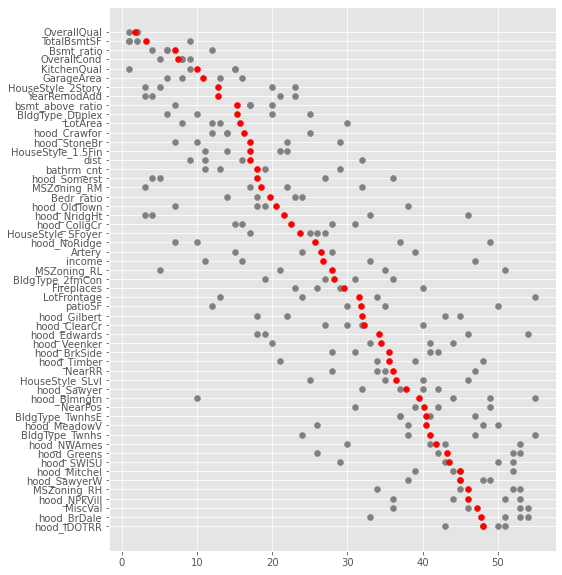

In [77]:
plt.figure(figsize=(8,10))

plt.scatter(y = all_feat['Feature'][::-1], x = all_feat['XGboost'][::-1],  color='gray')
plt.scatter(y = all_feat['Feature'][::-1], x = all_feat['lasso'][::-1],  color='gray')
plt.scatter(y = all_feat['Feature'][::-1], x = all_feat['svm'][::-1],  color='gray')
plt.scatter(y = all_feat['Feature'][::-1], x = all_feat['random_for'][::-1],  color='gray')
plt.scatter(y = all_feat['Feature'][::-1], x = all_feat['overall_rank'][::-1],  color='red')

plt.savefig('./Figures/feature_imp', bbox_inches = 'tight', dpi=350)
